# Mixing time for an inhomogeneous system
### Group: Ana Julia Antunes Souza and Cecilia Pires de Oliveira Capela


## 1. Introduction
   In this TP, we used the Python language as a tool to study __molecular dynamics simulation__. That means that we studied the dynamics of "particles" that represented molecules (or atoms). We considered that these particles were bound to a box of size LxL and we studied the interactions between pairs of particles, as well as between the particles and the wall.  
    
   We considered the particles as two-dimensional "hard disks" with a radius σ as a simplification for the model. As a result, it is easier to calculate the positions, trajectories and even to simulate the physical situation. 
   

## 2. Base model of the particles

### 2.1. Initial system
To create the initial system, we defined the number of particles in the system (N), the radius of the particles (sigma) and the size of the box (L). The particles were initialized with random positions inside the box, considering the positions between *sigma* and *L-sigma* in both directions so as to consider the physical dimension of the particles. 

The result of the initial system is presented in the following image:
<div>
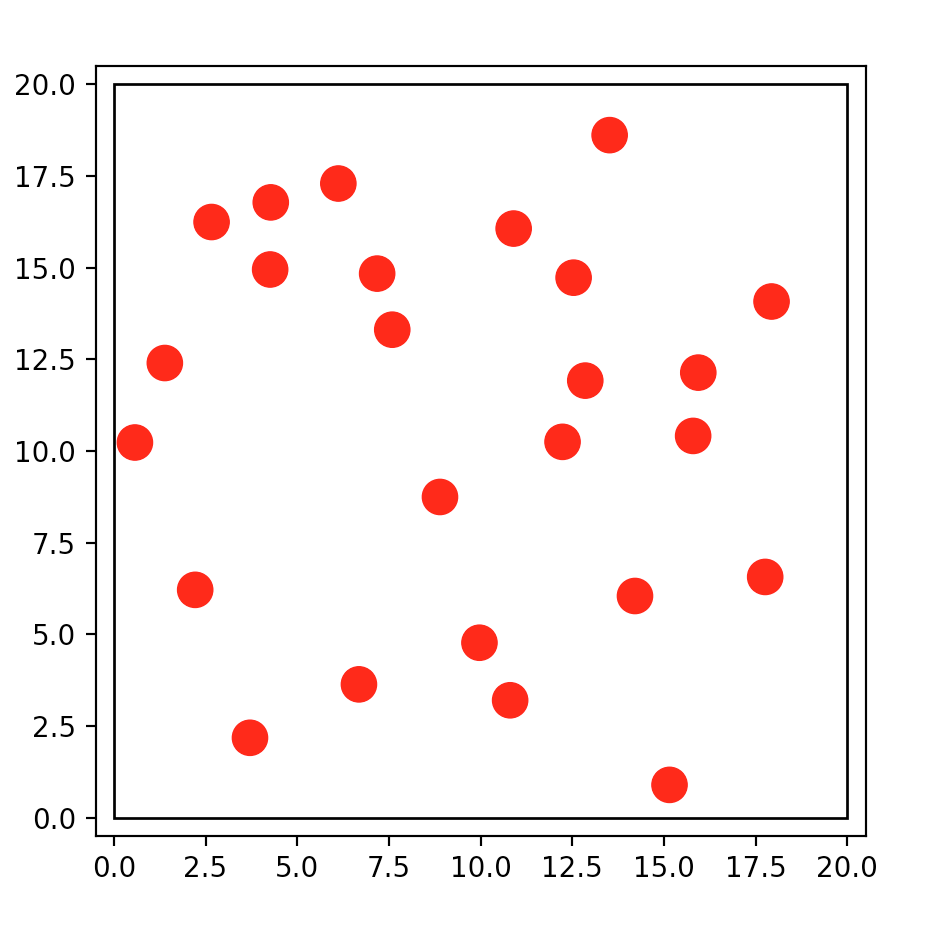
</div>

### 2.2. Initial velocities
The velocities were defined as random velocities using np.random.rand(). 

## 3. Collisions 
 
### 3.1. Collisions with the wall
The function `_wall_time( )` calculates for each step the first collision time between a particle and any wall. It analyses based on the velocity and the distance to any given wall all of the times that will take for the particles to collide with a wall and it returns the smallest time of collision, that particle that will collide and the direction of that wall (vertical or horizontal).   

### 3.2. Collisions with other particles

Similarly, the function `_pair_time()` accounts for the first collision between any pairs of particles. Firstly, the pairs are indexed using the numpy function triu_indices. That way, it is possible to calculate the distance and relative velocity of any pair of particles i and j. 
The collision is the moment where the distance between two particles is equal to 2 times the radius (2 sigma). Thus, it is possible to say:

$$ (2σ)^2 = (r_{init,x}+v_{init,x}*t_{collision})^2 + (r_{init,y}+v_{init,y}*t_{collision})^2 $$


<div>
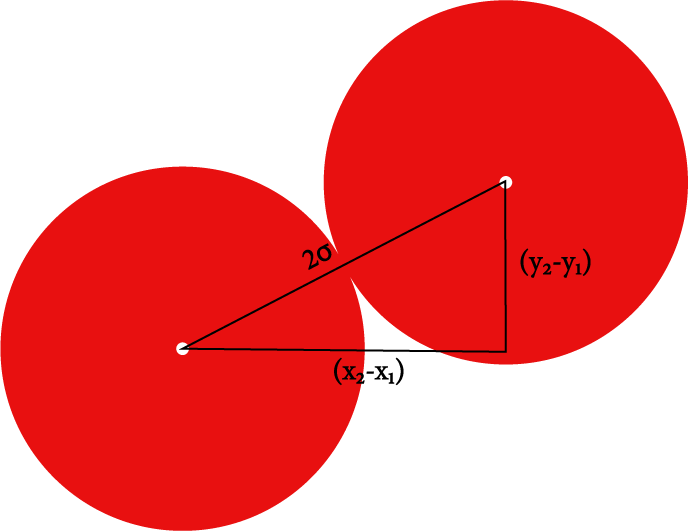
<div>

where r is the relative position and v the relative velocity of the particles.
Afterwards, the time of the collision can be isolated, which comes down to solving a second degree equation:

$$ t_{collision} = \frac{-b -\sqrt{\Delta}}{2a}$$

with:

$ a = v_{init,x}^2 + v_{init,y}^2 $

$ b = 2*(r_{init,x}*v_{init,x}+r_{init,y}*v_{init,y}) $

$ c = r_{init,x}^2 + r_{init,y}^2 - 4*\sigma^2 $

That way, the collision time will only be calculated if:

$\bullet$ Delta is positive, to ensure the solution is real

$\bullet$ b is negative, that is, particles are getting closer

$\bullet$ c is positive, so to only consider cases where the distance between particles is greater than 2\sigma

If the conditions are not met, np.inf is used in order to associate an infinite value to the collision time of particles i and j. That way, the function returns the minimum time for the collision of a pair of particles, as well as their indexes i and j.

### 3.3. Updating velocities

Now, collision times are already calculated and the function `md_step()` will be used in order to update velocities succeding a collision. Firstly, it is evaluated, in a boucle while, if either the minimum collision time between a particle and the wall or between two particles is inferior to the sampling time. If that's the case, at least one collision will happen within the sample time. Next, it is analysed if the next collision (the one with the smallest collision time) will be with the wall or with another particle, and positions and velocities are updated accordingly.

As a simplification, all collisions were considered to be perfectly ellastic. That means that when a particle collided with the wall, the particle returned with negative velocity of the opposite component as the direction of the wall it collided. For example, if the particle collided with one of the vertical walls, the x-component of the velocity would change sign. 

For the collisions between particles, this simplification implies the conservation of kinetic energy. Combined with the momentum conservation and considering particles of equal mass, the velocities of the particles are given by:

$$\textbf{v}_1' =\textbf{v}_1 -\hat{ \textbf{r}} (\hat {\textbf{ r}}  \cdot ( \textbf{v}_1 -\textbf{ v}_2) )$$,  $$\textbf{v}_2' =\textbf{v}_2 +\hat{ \textbf{r}} (\hat {\textbf{ r}}  \cdot ( \textbf{v}_1 -\textbf{ v}_2) )$$

where $\hat{\textbf{r}}$ is a unit vector in the direction of the vector joining the centres of the particles.

Then, the collision time is added to a variable called "current time". In this way, the boucle while will be valid as long as the next minimum collision time is inferior to the sampling time plus the ellapsed time (current time).
Lastly, it is necessary to update the collision times by calling the functions `_wall_time()` and `_pair_time()`, as well as the positions of the particles (from the last collision - that happened in "current time" - to the end of the sampling time).


### 3.4. Pressure

For the particles confined in a box, the only contribution to the pressure considered was the exchange of momentum with the walls. That way, each colision with the wall exchanges a momentum of:

$$ I= 2 m\, {\bf n}\cdot {\bf v} $$

where n is the wall normal. 
The pressure is thus given by the average of the momentum, divided by the dimension of the box (in this case, four times the wall size). Therefore, each collision added a contribution to the pressure.

# 4. Mixing time for an inhomogeneous system

## 4.1. Initial configuration
In this part of the project, we created a inhomogeneous system composed of two different molecules (or atoms), represented by blue and red particles. In the initial distribution, we considered an inhomogeneous system with the red particles separed from the blue particles, as if there were a wall in the middle of the box separating the particles. The initial distribution was as follows: 
<div>
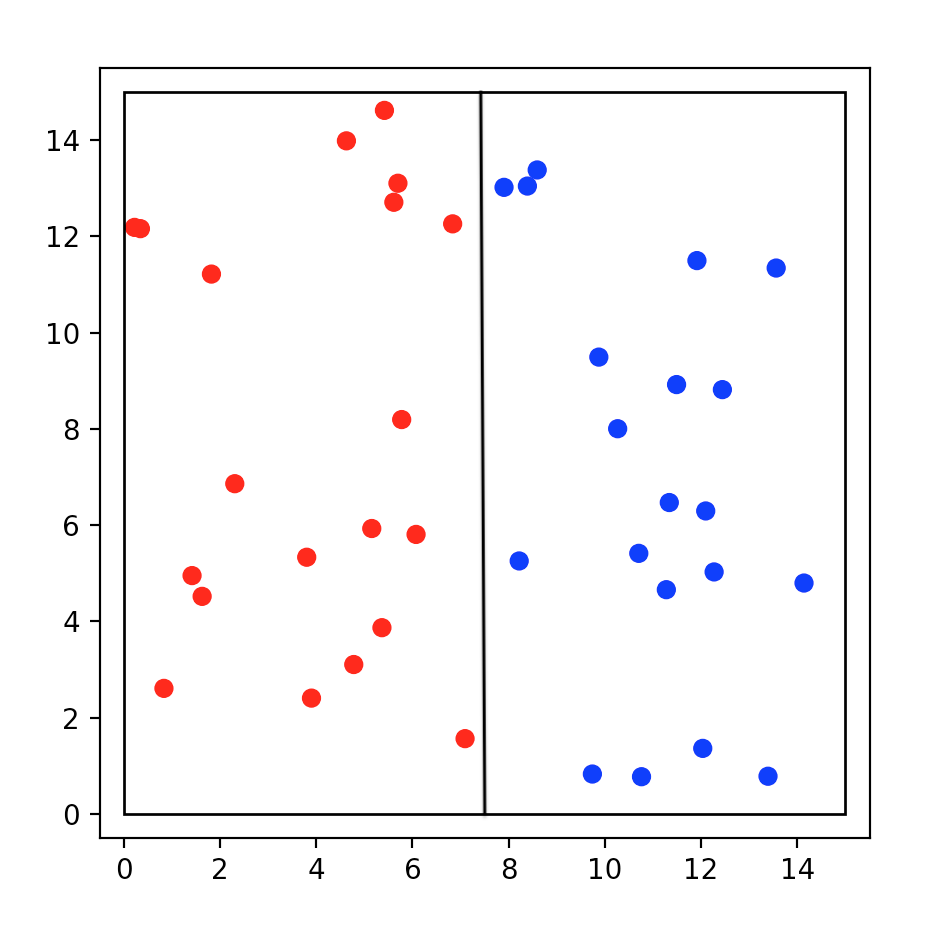
</div>

To create the two-color particles, we changed the code in the file `animatesimul_mixing.py`. Then, to configure the initial positions, we adapted the function `__init__()`, creating two matrix, one with the initial position of the red particles and one with the blue particles. The red particles were set up to have random positions, using np.random.rand(), inside the left part of the box. Then, the blue particles were also set up to have random positions, but in this case inside the right part of the box.

Since the collisions between particles could (and should) exist between blue and red particles with no distinction, we concatenated the two matrix with the positions as one matrix with the positions of both particles. Then, a matrix with the velocities of the particles was created with the size of the positions matrix. The velocities were randomized for both particles. By concatening the positions matrix, we could then reuse the functions `_wall_time()`, `_pair_time()` and `md_step()` with no significant change. It is worth mentioning that with only one matrix there was no distinction between the collisions of same-colored particles and different-colored particles, which was our goal. 

## 4.2. Mixing
After the initial configuration, the physical barrier that was separating the blue and red particles was removed and the particles started to collide between themselves. Since the collisions were perfectly ellastic, the collisions between blue and red particles end up mixing the particles together. After some time, we could visually see that we reached an uniform distribution between the particles inside the box. However, **how could we determine the actual time the system became homogenous?**. For that, we decided to used a statistical test which compared our particle distribution with an uniform distribution. 


## 4.3. Statistical analysis 
To determine whether the system was homogeneous, we used the __kolmogorov-smirnov statistical test__. With this test, we were able to explore the time needed for the system to become uniform as a function of the number of particles and the initial density of particles.
#### 4.3.1. Kolmogorov-Smirnov Test
The Kolmogorov-Smirnov Test can be used to compare a sample with a reference probability distribution (in our case, an uniform distribution), or to compare two samples (for example, the sample with the red particles and the sample with the blue particles). We decided to perform the two-sample Kolmogorov-Smirnov test for goodness of fit, which compares the underlying distributions of two independent samples. In other words, we decided to compare the positions of the red particles with those of the blue. 
To perform the Kolmogorov-Smirnov Test, the the function `scipy.stats.kstest()` from the Python library scipy was used. It receives two arguments, the two samples that we wish to compare, and it returns the "statistic" (first value) and the p-value (second value). 
The results can be interpreted as following:

1. We can compare the statistic value given by python to the KS-test critical value table according to the sample size. When statistic value is higher than the critical value, the two distributions are different. For example, the statistic value for 𝑁 samples is close to $1/\sqrt{N}$ if the distributions are identical. 

2. We can compare the p-value to a level of significance a, usually a=0.05. If p-value is lower than a, then we reject the null hypothesis that the two distributions are identical, which means that it is very probable that the two distributions are different.

The following image shows the meaning of the KS statistic value:



<div>
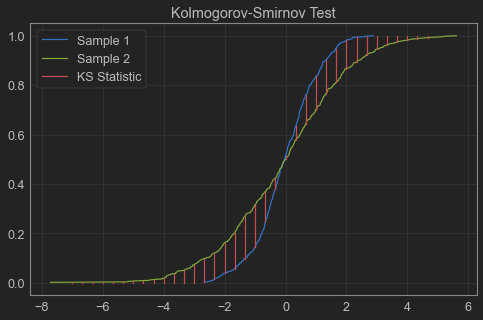
</div>

#### 4.3.2. Application of Kolmogorov-Smirnov Test
We performed the scipy Kolmogorov-Smirnov statistical test to our particle positions, comparing the distribution of red particles with the distribution of blue particles. We used the following code inside the funcion `md_step()`:
                
                self.unifx = scipy.stats.kstest(self.position [:self.N, 0],self.position [self.N:, 0])

Then, the first term of the array `self.unifx[0]` will be the **statistic term** and the second term `self.unifx[1]` will be the **p-value**.

The null hypothesis is: **The distribution of the red and blue particles are identical**. 
We are going to choose a confidence level of 95%; that is, we will reject the null hypothesis in favor of the alternative if the p-value is less than 0.05. 
Also, we are going to test if the distributions are identical by comparing the statistic value with $1/\sqrt{N}$ (as explained in section 4.3.1) with N being the sample size.

If these two conditions apply, that is if p-value is greater than 0,05 and the statistic value is approximately equal to $1/\sqrt{N}$, then we conclude that we reached a **homogenous system**. 

We recorded the time for the system to become mixed by using the funcion `time.time()`. We recorded the values of the time for each step in a variable called $t_1$ and created a matrix $t_2$ that stored all the values of $t_1$ (which changed between each iteration or md_step). The values of the matrix $t_2$ were used to plot the graps of *statistic x time* and *p-value x time*. 


#### Homogeneous system
In the file `animatesimul_mixing.py`, we implemented inside the function `_anim_step()` an _if_ statement to determine when the system became homogeneous, that is, when the distribution for the red and blue particles were considered identical by the KS statistic value, as well as when p-value became grater than 0,05: 
```python 
        if (self.x == False):
            if m >=1:
                if ((self.simulation.unifx[1] > 0.05)  & (self.simulation.t1 >= self.simulation.t2[1]) & (self.simulation.unifx[0] < (1/np.sqrt(self.simulation.N)))):
                    self.x = True
                    t = self.simulation.t1
                    self.unif_text.set_text('The mixing is uniform in t = %.3f' %t)
                else:
                    pass 
```
That means that for each step we calculated the p-value and the statistic value for the comparison between the two samples (red and blue particles). When both of the conditions were satisfied ($p > 0,05$ and $ statistic = 1/\sqrt{N}$), then we concluded that we reached an homogenous system. At that point, we printed on the simulation screen that the mixing was uniform and the time it took to become uniform, as can be seen in the following image:
<div>
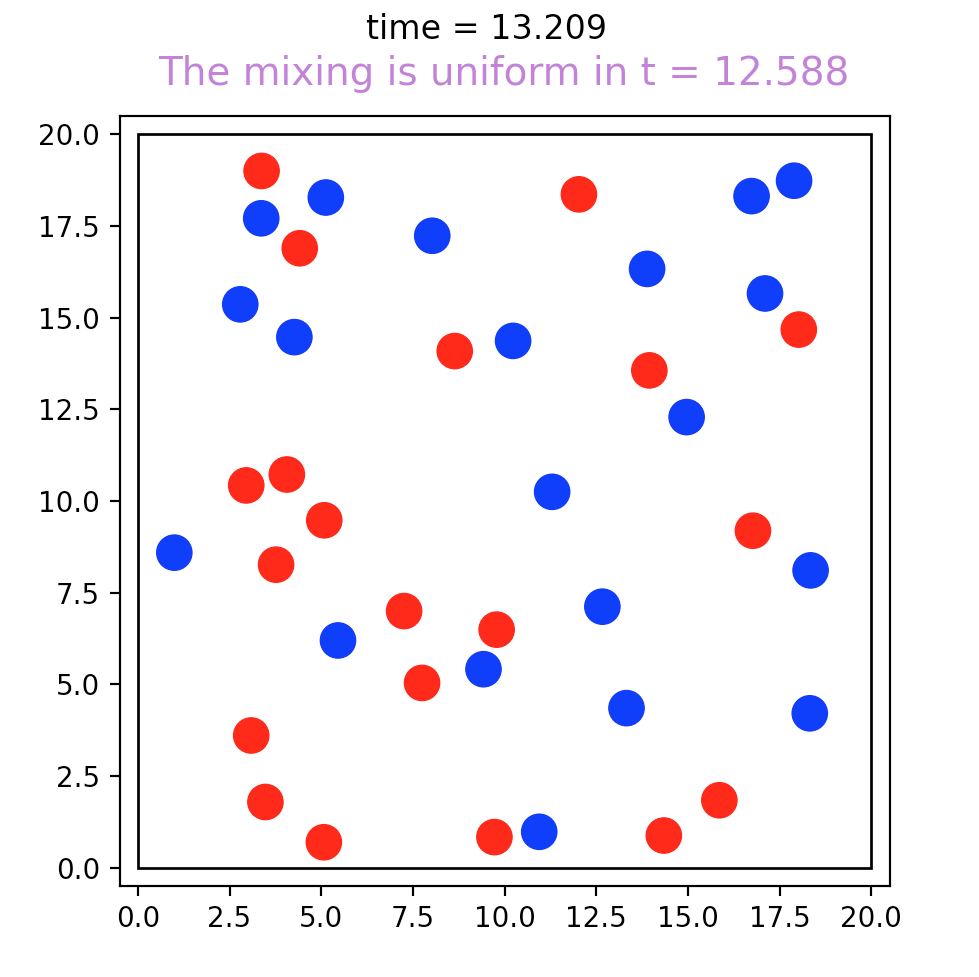
</div>

It is worth mentioning that we also implemented a timer inside `_anim_step()` for one to be able to see the evolution of the gas mixing. 

## 5. Results

Finally, we tested various configurations as to study the effect of the variables on the time it took for the system to reach homogenicity. 

### 5.1. Varing number of particles

In this part, we kept the radius of the particles and the length of the box constant and equal to $\sigma =0,5$ and $L = 30$, respectely. Then, we varied the number of particles, starting from $N = 5$ (which means that are 5 red particles and 5 blue particles) and ending with $N = 50$ (which means that are 50 red particles and 50 blue particles). Then, we calculated the time for these different systems to become uniform. 


| Total number of particles | Time (s) |
| :-: | :-: |
| 10 | 5.239 
| 20 | 9.979 
| 40 | 10.575
| 60 | 29.004 
| 80 | 31.117 
| 100 | 47.675 
| 120 | 63.195 
| 140 | 84.142 

By plotting the mixing time as a function of the total number of particles, we obtain:
<div>
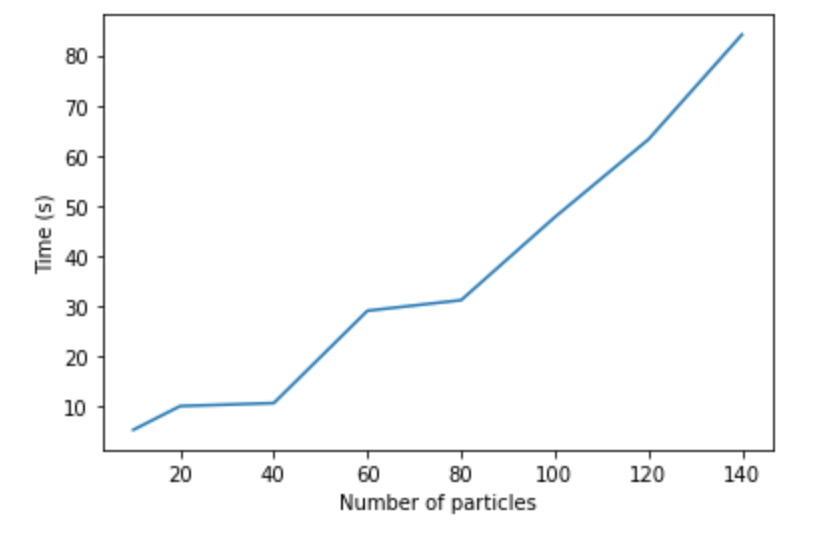
</div>

So, generally, we can conclude that the time for the system to become homogenous increases as the number of particles increases. However, since the velocities for each experient are ramdomized and, therefore, different for each time we run the program, there can be significant differences between the values between each run of the program even for the same number of particles. Still, it is possible to affirm that the time for the particles to mix is directly proportional to the number of particles. A possible explanation for this is that the increased number of particles results in more hindrance, which means that same color particles will collide more and there will be less space for them to spread out. For example, if we take an extreme case of many particles in the box, we can visually see that there will be pratically no free space for the particles to collide and after mix up, which culminates in the increased time for uniformization:


<div>
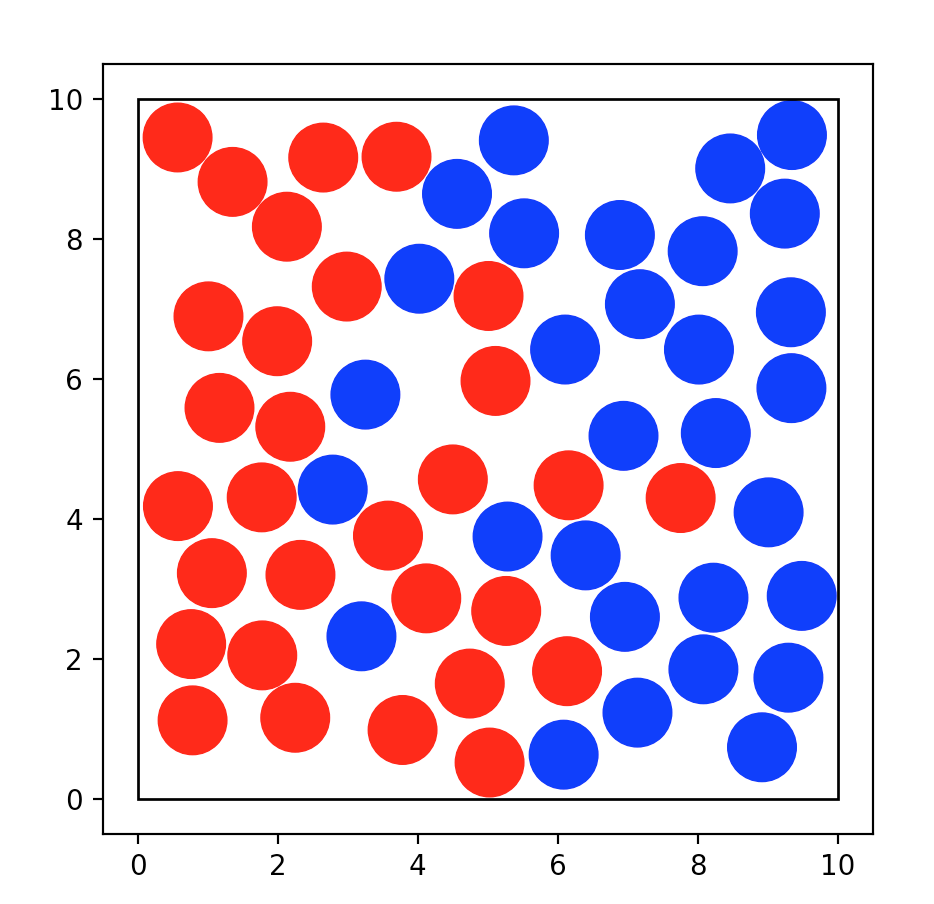
</div>

### 5.1. Varing radius of particles
The following parameter tested was the radius of the particles. We maintained the length of the box $L = 20$ constant and the number of particles $N = 40$ constant, as well. We then varied the radius $\sigma$ of the particles. We obtained the following times for the system to become uniform:

|$\sigma$ | Time (s) |
| :-: | :-: |
| 0.1 | 11.917 
| 0.3 | 9.369 
| 0.5 | 13.968
| 0.8 | 16.374 
| 1.0 | 35.539 
| 1.2 | 61.660 
| 1.5 | 77.755 
| 1.8 | 92.142 
| 2.0 | 84.142

We obtained the following graph:
<div>
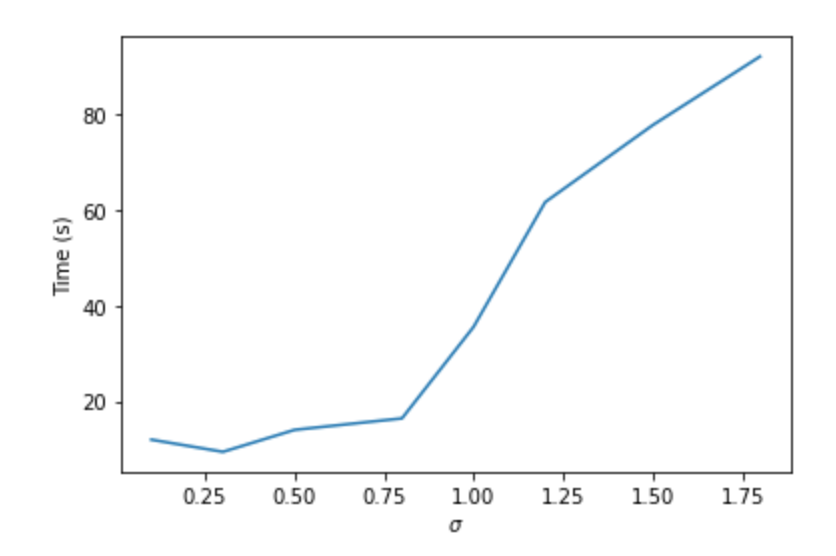
</div>

It is evident that when we increase the size of the particle, the time for the system to mix also increases. The explanation is the same as the explanation for the number of particles given above. When we increase the radius of the particles, there will be less free space for them to mix. As a result, the time for the atoms to be uniformly distributed will increase. We can see visually the hidrance with bigger radius in the following image: 




<div>
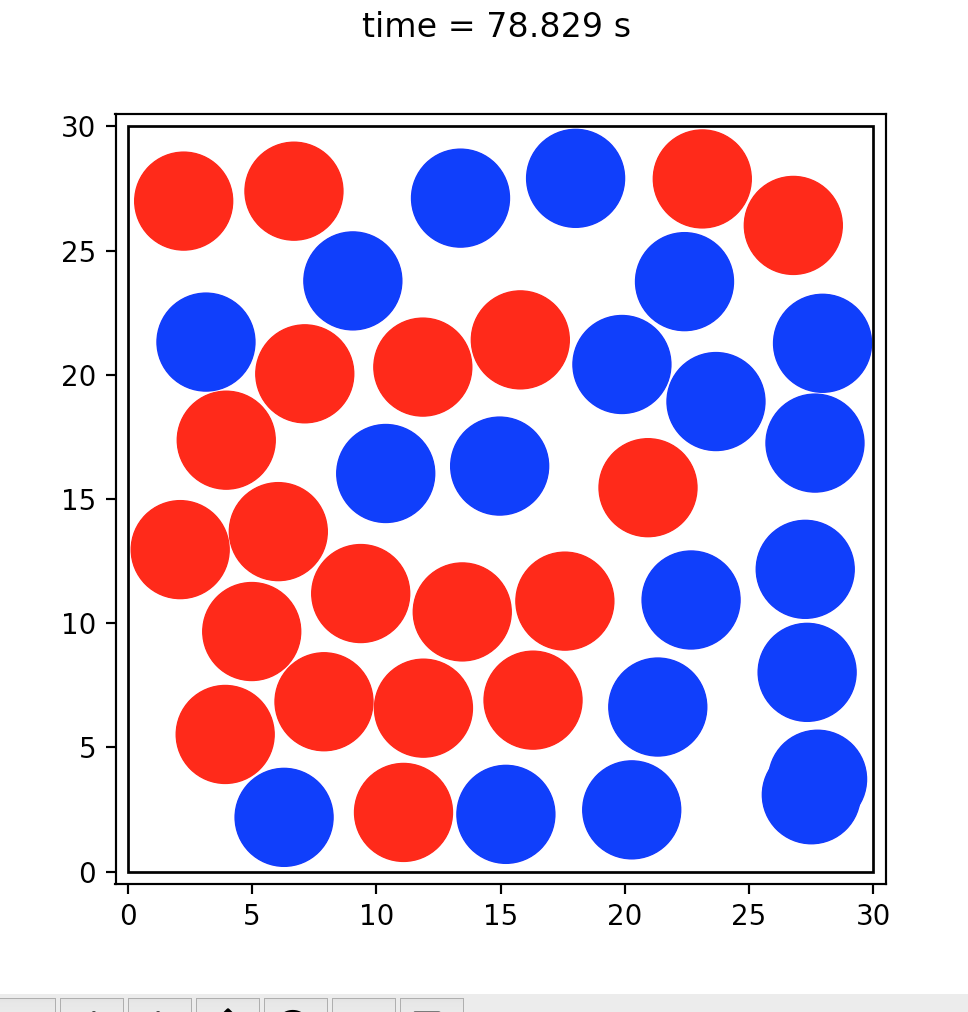
</div>

It is worth mentioning that, in the beginning, since the radius is very small and the velocities are chosen at random, the radius of the particles does not influence as much, because there is still a lot of free space. As a result, the velocities impact more than the radius and consequently we could have values of time smaller for bigger radius (because there is so much free space that the radius does not significantly impact on the collisions and therefore the velocities influence more). 


### 5.1. Varing the size of the box

Finally, we varied the size of the box, keeping the number of particles and their radius constant. 
The result is exposed in the table, as well as in the graph: 

For $\sigma = 0.5$ and $N=30$. 
|L| Time (s) |
| :-: | :-: |
| 15 | 48.131
| 30 | 33.643 
| 50 | 23.759
| 60 | 22.999
| 70 | 21.330
| 80 | 16.374 
 

In general, we can see that if we increase the size of the box, the time for the system to be uniform will decrease. If we think about the free space, which increases with the size of the box, it makes sense that the time decreases. We can see this phenomenon illustrated in the two images, which represent the same system with a box of size L = 30 and size L = 90:
<div>
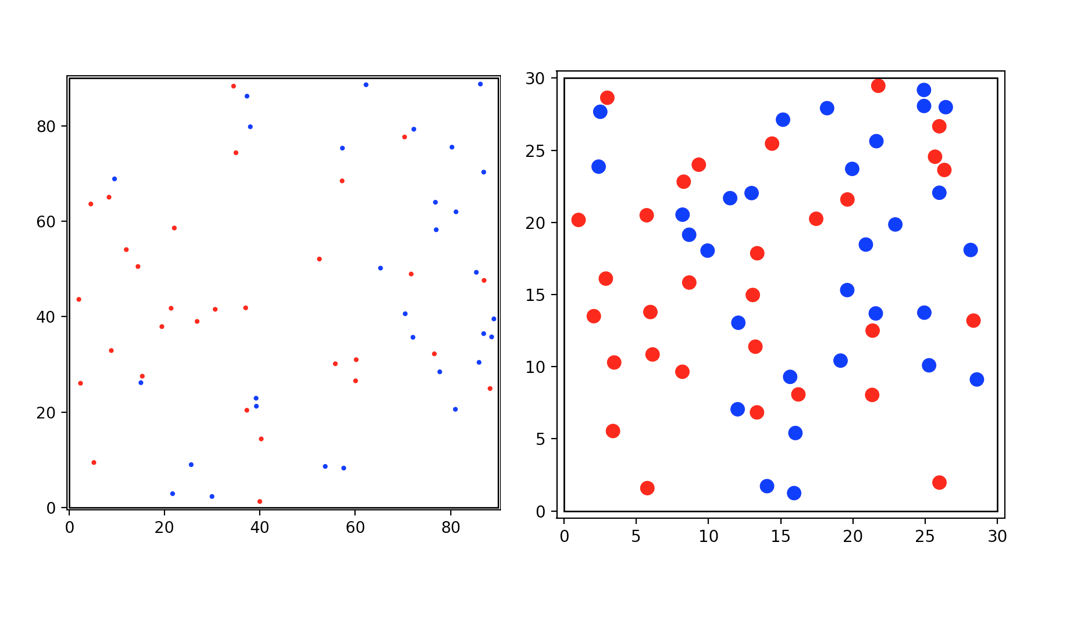
</div>

However, it should be noted that if increasing significantly the size of the box will increase the time the system becomes uniform, because the particles will have to travel a long distance to collide with another particle and with the wall, so that it will take a lot of time for the system to be uniform. For example, if we take a box of size L = 100, the time for the system to be uniform will increase significantly:

<div>
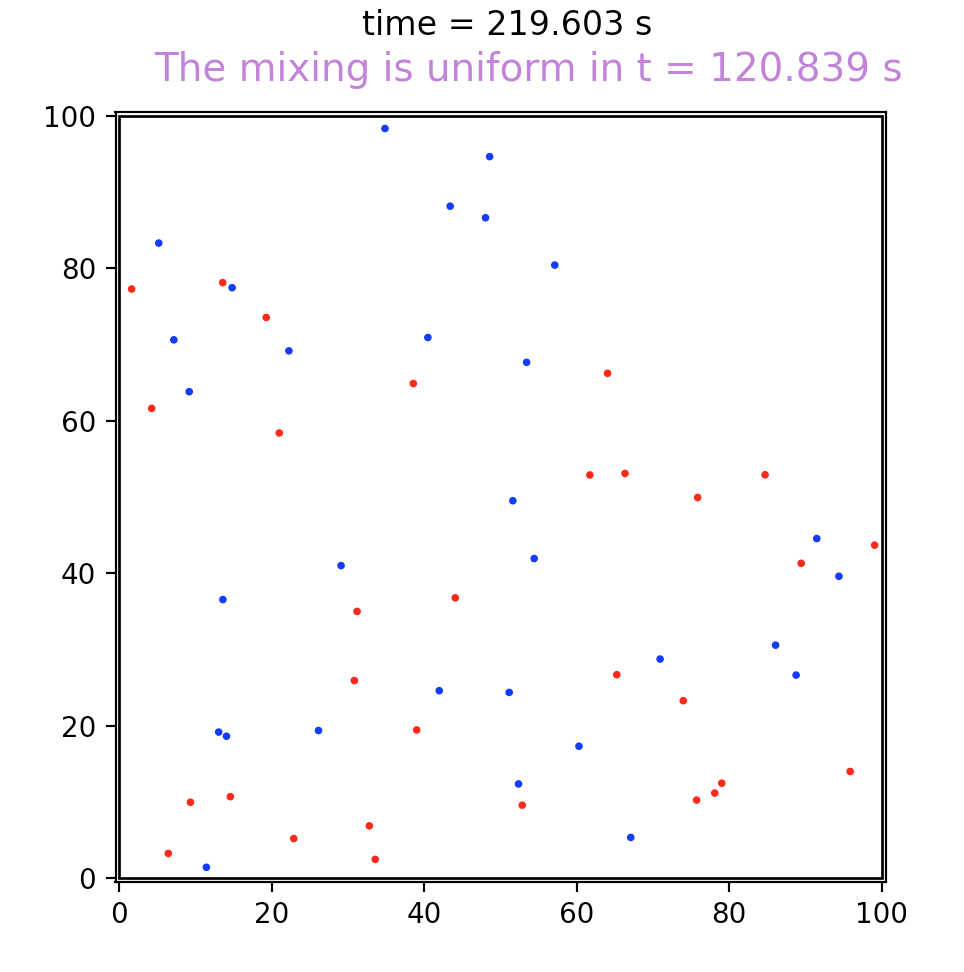
</div>

<div>
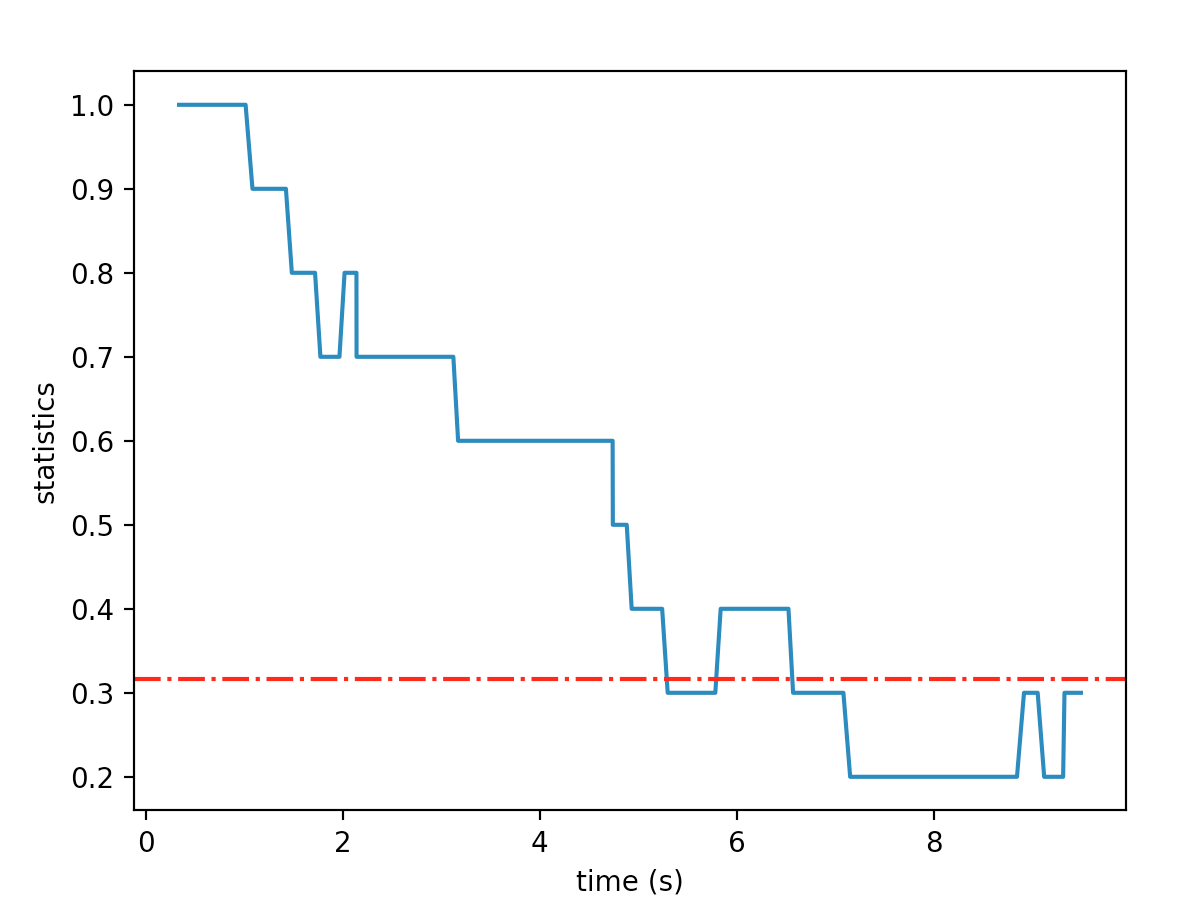
</div>


<div>
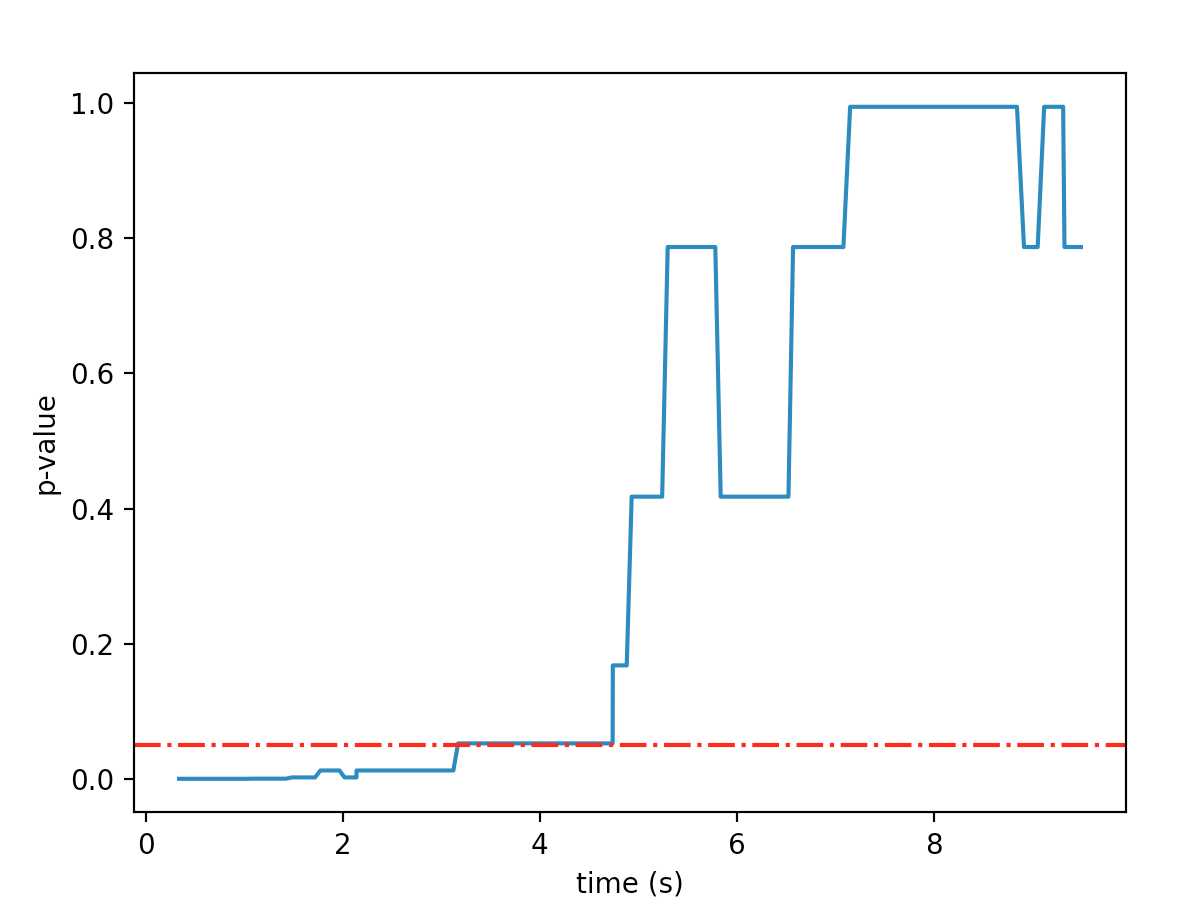
</div>

Aqui da pra falar que depois de ficar uniforme pela "primeira vez", o sistema oscila perto do valor de 1/sqrt(N)
<div>
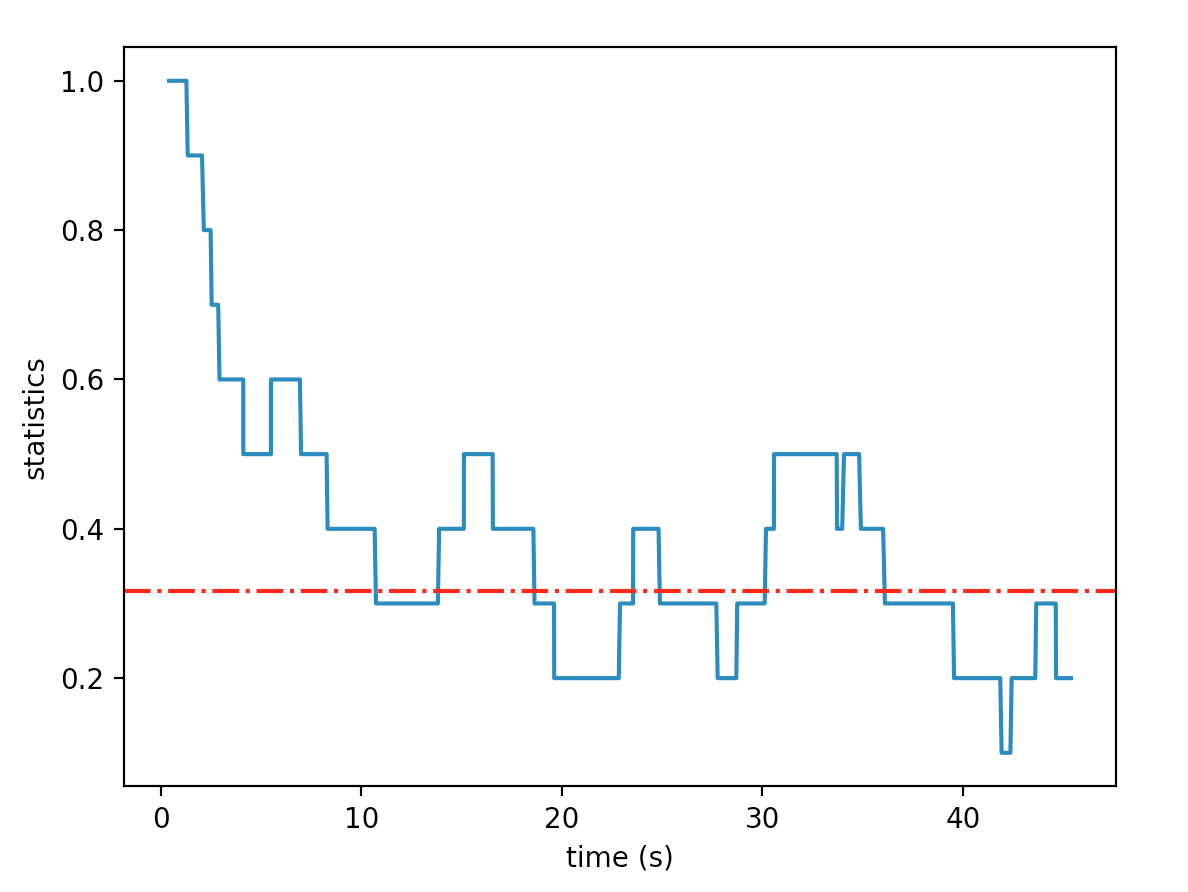
</div>